## Predict Podcast Listening Time

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [4]:
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [6]:
test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [7]:
median_length = train['Episode_Length_minutes'].median()
train['Episode_Length_minutes'].fillna(median_length, inplace=True)
train['Episode_Length_minutes'] = train.groupby('Genre')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.median()))

median = test['Episode_Length_minutes'].median()
test['Episode_Length_minutes'].fillna(median, inplace=True)
test['Episode_Length_minutes'] = test.groupby('Genre')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.median()))


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3588871706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Episode_Length_minutes'].fillna(median_length, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3588871706.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Observation:
Different genres likely have different episode length patterns. Using the overall median would distort the true distribution within each genre. This group-level imputation ensures each genre is treated equitably and it helps reatain relationships between features.

In [8]:
train['Has_Guest'] = train['Guest_Popularity_percentage'].notnull().astype(int)
train['Guest_Popularity_percentage'].fillna(0, inplace=True)
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].median())

test['Has_Guest'] = test['Guest_Popularity_percentage'].notnull().astype(int)
test['Guest_Popularity_percentage'].fillna(0, inplace=True)
test['Guest_Popularity_percentage'] = test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].median())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3065452659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Guest_Popularity_percentage'].fillna(0, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3065452659.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Observation:

- 'Has_Guest' indicates whether a value exists in the Guest_Popularity_percentage.
- 0 means null NaN, 1 means there is a value.

- I fill all missing values in Guest_Popularity_percentage with 0, considering missing value could imply the absence of a value, example, a guest with 0% popularity or a guest that hasn't been rated yet.

- Then, any remaining missing values are replaced to median. This helps to model the data more accurately without assuming that missing values are completely random or extreme.

In [9]:
train['Number_of_Ads'].unique()

array([  0.  ,   2.  ,   3.  ,   1.  ,  53.37,    nan, 103.91, 103.  ,
        53.42, 103.75,  12.  , 103.25, 103.88])

In [10]:
train['Number_of_Ads'].fillna(train['Number_of_Ads'].mode()[0], inplace=True)
test['Number_of_Ads'].fillna(test['Number_of_Ads'].mode()[0], inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3232574779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Number_of_Ads'].fillna(train['Number_of_Ads'].mode()[0], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\3232574779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [11]:
train['Number_of_Ads'] = train['Number_of_Ads'].round().astype(int)

In [12]:
train['Number_of_Ads'].unique()

array([  0,   2,   3,   1,  53, 104, 103,  12])

Observation:

- Since the Number_of_Ads feature represents a count, integer values are more appropriate than floats, so i round up the floats to make it integers.

- Although Number_of_Ads values are discrete categories, the data has a few unique values repeated often just like categorical data. 

In [13]:
train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
Has_Guest                      0
dtype: int64

In [14]:
test.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Has_Guest                      0
dtype: int64

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [17]:
train.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                    int32
Episode_Sentiment               object
Listening_Time_minutes         float64
Has_Guest                        int32
dtype: object

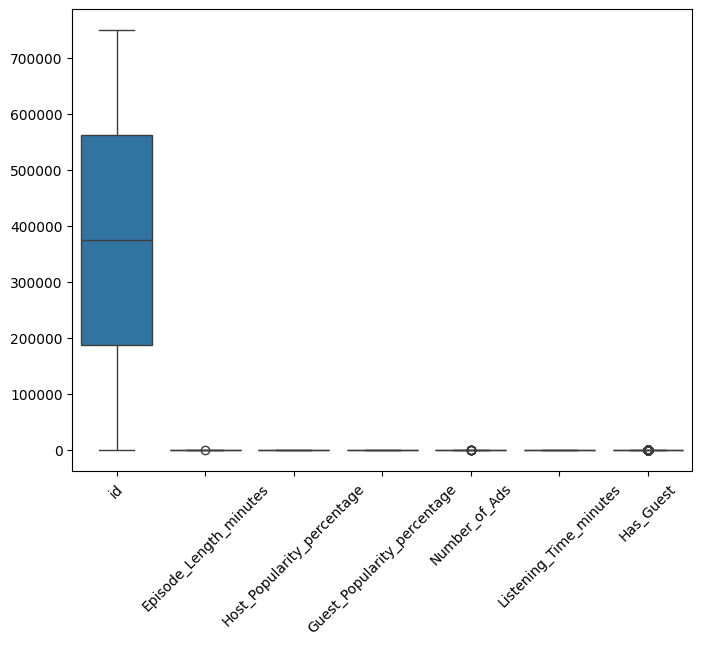

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train)
plt.xticks(rotation=45)
plt.show()

In [19]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = train.select_dtypes(include=['number']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(train, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in id: 0
Outliers in Episode_Length_minutes: 1
Outliers in Host_Popularity_percentage: 0
Outliers in Guest_Popularity_percentage: 0
Outliers in Number_of_Ads: 9
Outliers in Listening_Time_minutes: 0
Outliers in Has_Guest: 146030


In [20]:
train['Episode_Length_minutes'].unique()

array([ 63.84      , 119.8       ,  73.9       , ..., 112.002     ,
         6.71292308,  62.16729385])

In [21]:
train['Has_Guest'].unique()

array([0, 1])

In [22]:
train['Has_Guest'].value_counts()


Has_Guest
1    603970
0    146030
Name: count, dtype: int64

- Episode_Length_minutes/Number_of_Ads: The extreme values are only a few and don't disrupt the general distribution, we might keep them.

- Has_Guest: It is a binary column, consisting 0 and 1. There is no non-binary values found so we leave it as is.

### EDA

Numercial Columns

Correlation

In [23]:
corr = train.select_dtypes(include=['number']).corr()
corr

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Has_Guest
id,1.000000,-0.000515,0.000274,0.000527,0.000771,-0.000876,0.000132
Episode_Length_minutes,-0.000515,1.000000,0.022191,-0.004263,-0.051835,0.866221,0.003431
Host_Popularity_percentage,0.000274,0.022191,1.000000,0.006277,-0.017894,0.050870,-0.014853
Guest_Popularity_percentage,0.000527,-0.004263,0.006277,1.000000,-0.026558,-0.009380,0.629490
Number_of_Ads,0.000771,-0.051835,-0.017894,-0.026558,1.000000,-0.118341,-0.050970
Listening_Time_minutes,-0.000876,0.866221,0.050870,-0.009380,-0.118341,1.000000,0.002862
Has_Guest,0.000132,0.003431,-0.014853,0.629490,-0.050970,0.002862,1.000000


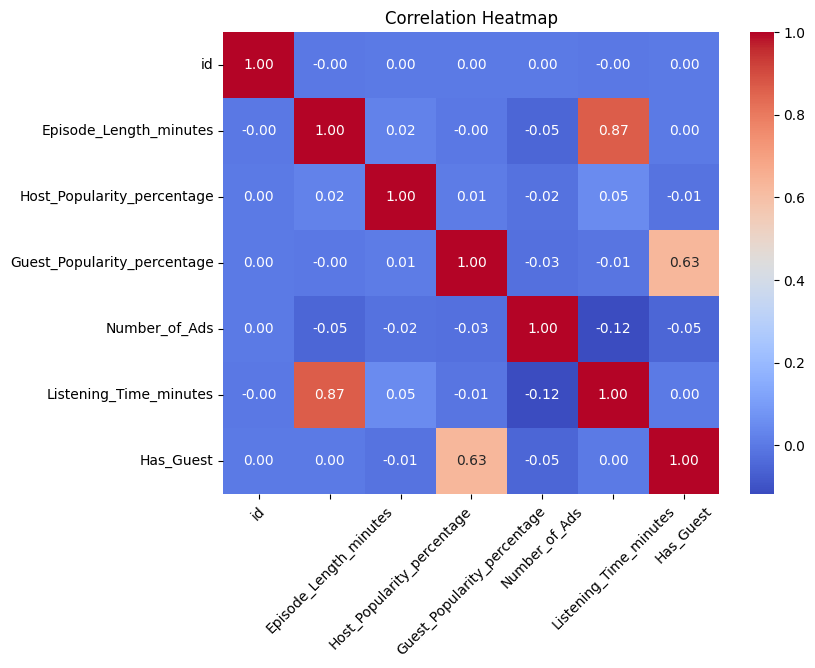

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()


In [25]:
target_corr = corr['Listening_Time_minutes'].sort_values(ascending=False)
target_corr[1:]

Episode_Length_minutes         0.866221
Host_Popularity_percentage     0.050870
Has_Guest                      0.002862
id                            -0.000876
Guest_Popularity_percentage   -0.009380
Number_of_Ads                 -0.118341
Name: Listening_Time_minutes, dtype: float64

Observation: 
- Episode_Length_minutes: 0.866 strong positive correlation. The longer episodes are, the longer listening times. This makes sense logically.

- Host_Popularity_percentage: 0.051 very weak correlation. The host popularity has little effect on listening time.

- Has_Guest: 0.003 essentially no relationship. Having a guest appear doesn't affect the result.
  
- id: - 0.009 no relationship.

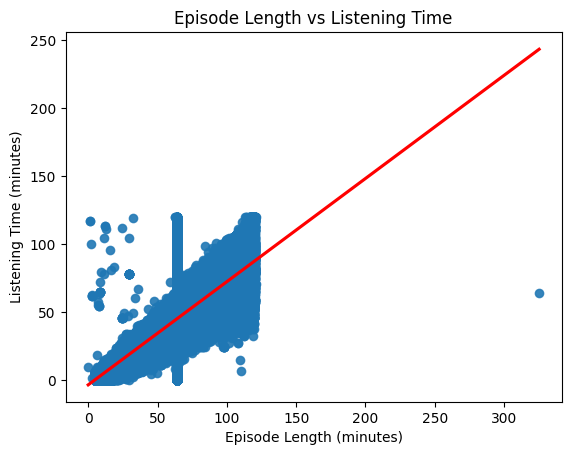

In [26]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train, alpha=0.5)
sns.regplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train, line_kws={"color": "red"})

plt.title('Episode Length vs Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.show()

Observation: The red line slopes upward, indicating longer episodes are associated with more listening time. Most episodes are short and have short listening times, and a few long episodes show higher listening time.

- Listeners stay longer for longer episodes only if they choose to listen to them.
- Shorter episodes dominate user behavior.

Listening Time by Has_Guest

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\2131307462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


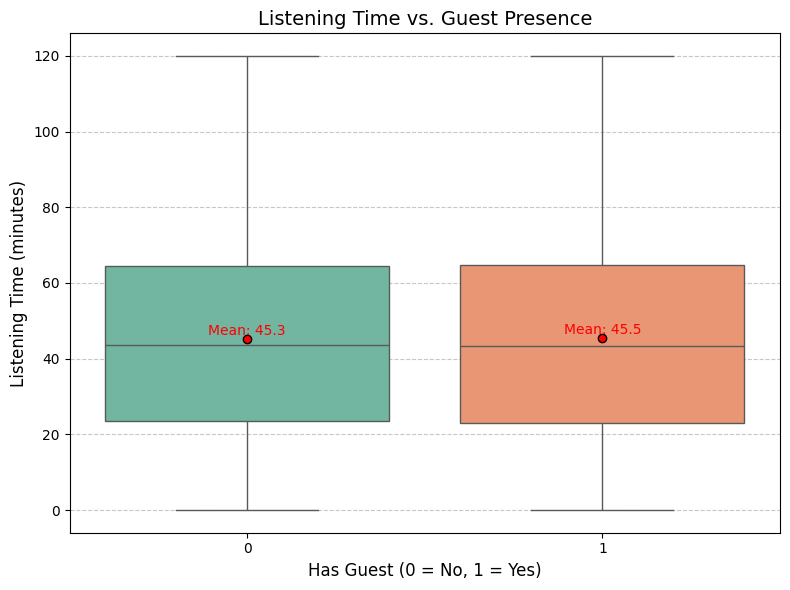

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Has_Guest',
    y='Listening_Time_minutes',
    data=train,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
)

# Add labels and title
plt.title('Listening Time vs. Guest Presence', fontsize=14)
plt.xlabel('Has Guest (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Listening Time (minutes)', fontsize=12)

# Optional: annotate with means
means = train.groupby('Has_Guest')['Listening_Time_minutes'].mean().round(1)
for i, val in enumerate(means):
    plt.text(i, val + 1, f'Mean: {val}', ha='center', fontsize=10, color='red')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observation: As i expected, no significant impact found. The presence of a guest likely does not influence listening time in a meaningful way. They spend about the same amount of time regardless of whether a guest is present.

Listening Time and Number of Ads

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\4257113293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number_of_Ads', y='Listening_Time_minutes', data=train, palette='Set2')


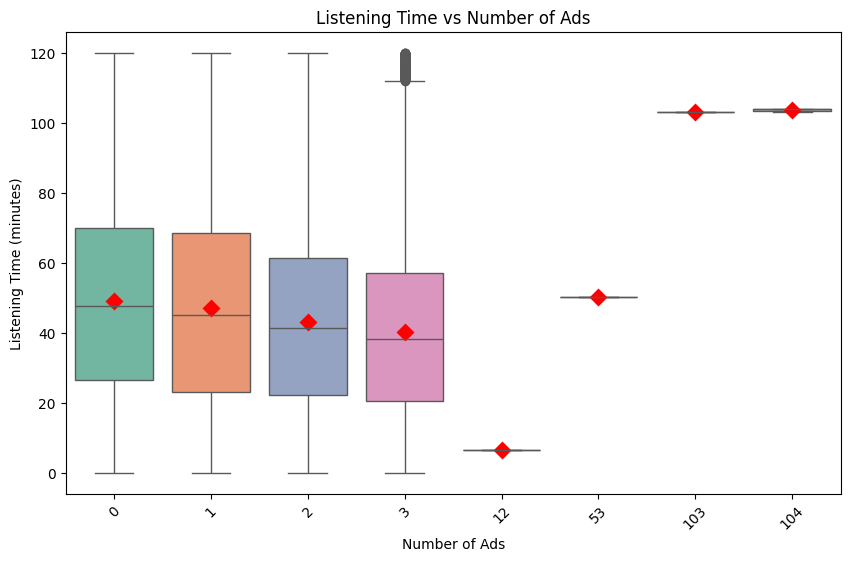

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number_of_Ads', y='Listening_Time_minutes', data=train, palette='Set2')
sns.pointplot(x='Number_of_Ads', y='Listening_Time_minutes', data=train, estimator='mean', color='red', linestyles='', markers='D')
plt.title('Listening Time vs Number of Ads')
plt.xlabel('Number of Ads')
plt.ylabel('Listening Time (minutes)')
plt.xticks(rotation=45)
plt.show()

Observation: Although they have no meaningful correlation, The longer listening time episodes probably have more number of ads.

Histogram of Listening Time

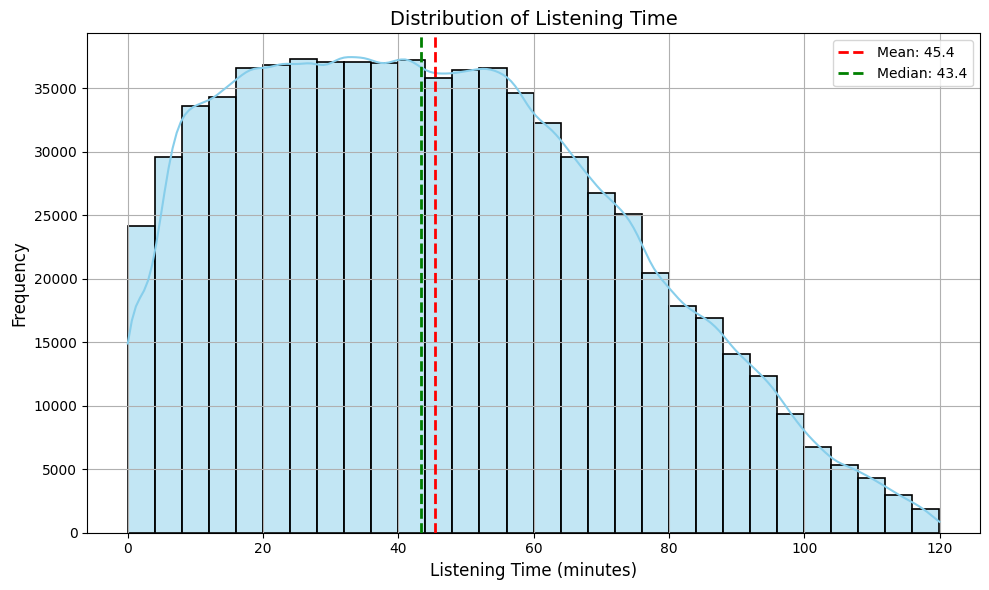

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Listening_Time_minutes'], kde=True, bins=30, color='skyblue', edgecolor='black', linewidth=1.2)

# Add mean and median lines
mean_val = train['Listening_Time_minutes'].mean()
median_val = train['Listening_Time_minutes'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')

# Labels and title
plt.title('Distribution of Listening Time', fontsize=14)
plt.xlabel('Listening Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Observation: The histogram is right-skewed, indicating that most episodes are relatively short, while a smaller number of episodes have significantly longer durations.

Categorical Columns

Podcast_Name (Top 10): F=51.73, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


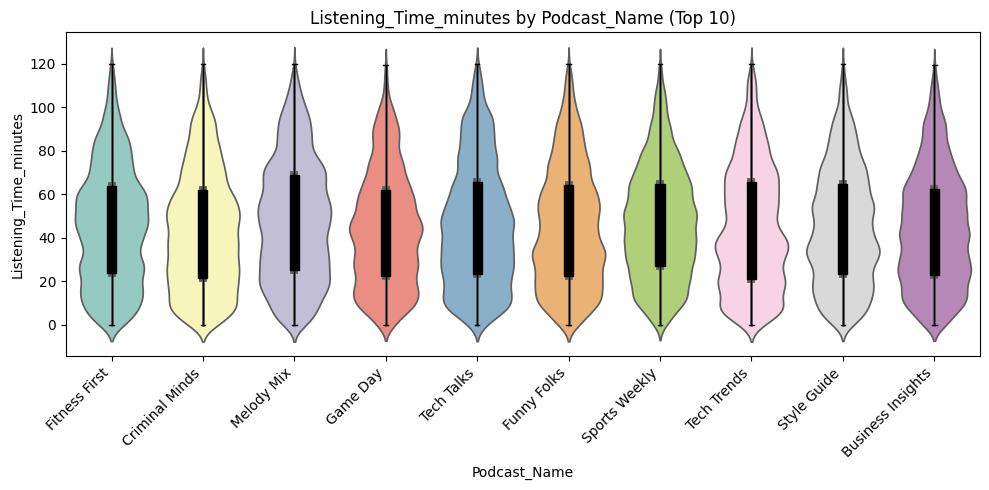

Episode_Title (Top 10): F=112.95, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


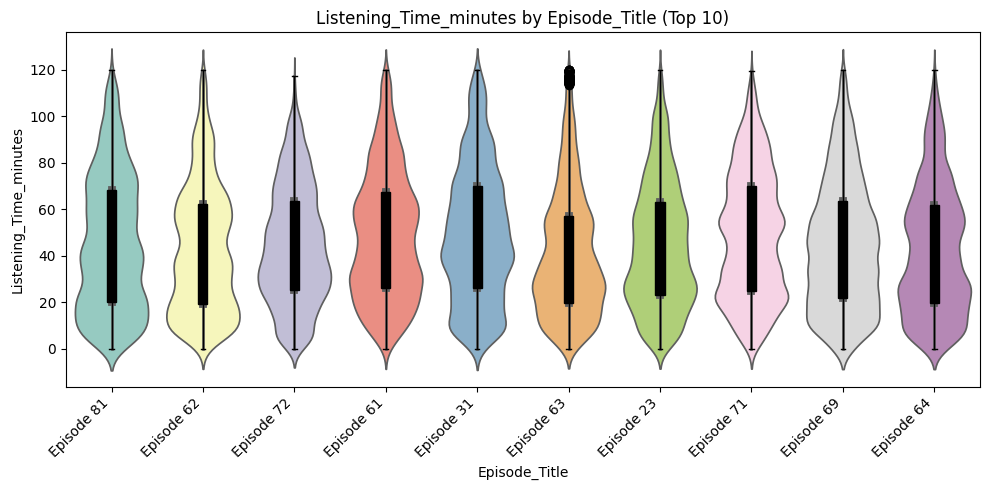

Genre (Top 10): F=45.48, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


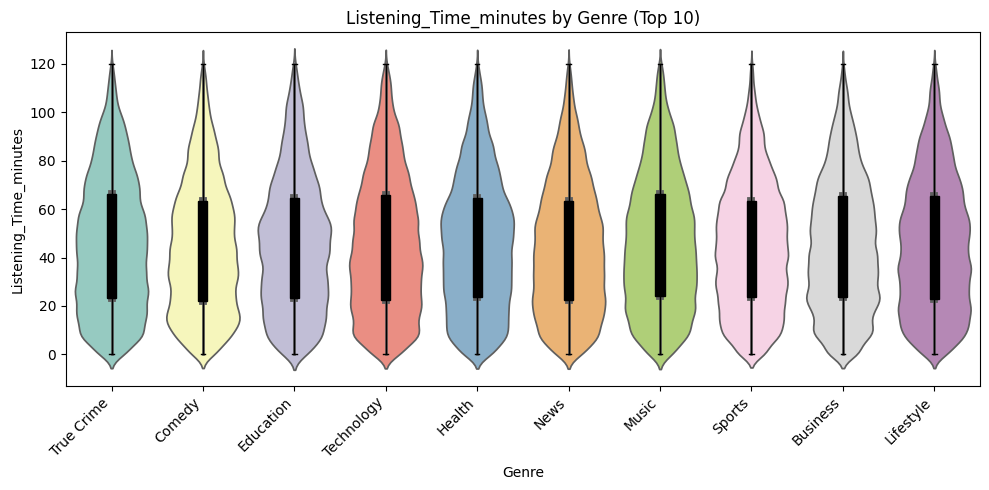

Publication_Day (Top 10): F=40.51, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


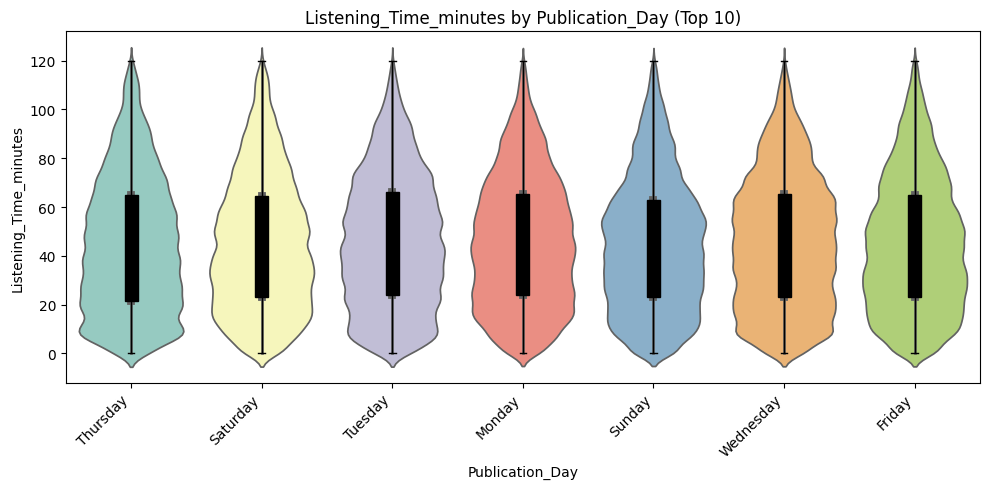

Publication_Time (Top 10): F=151.77, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


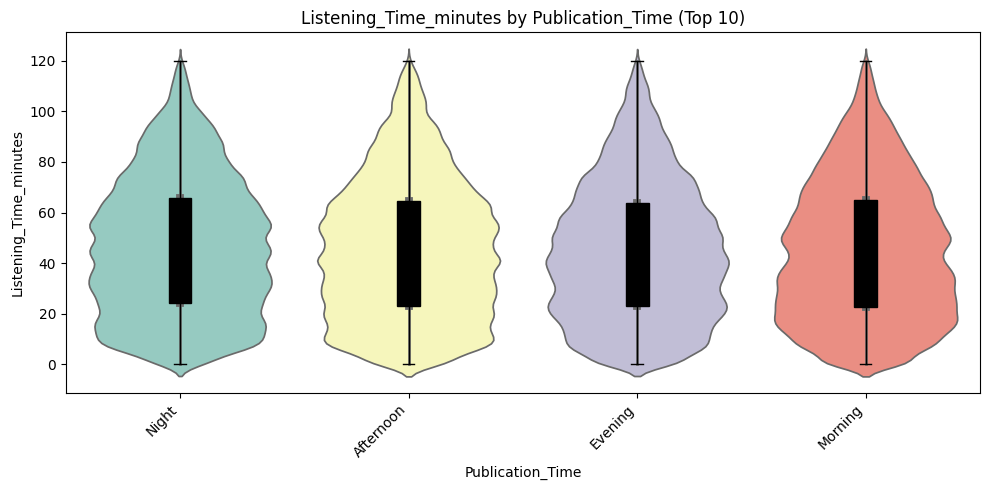

Episode_Sentiment (Top 10): F=586.01, p=0.0000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13468\752963067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')


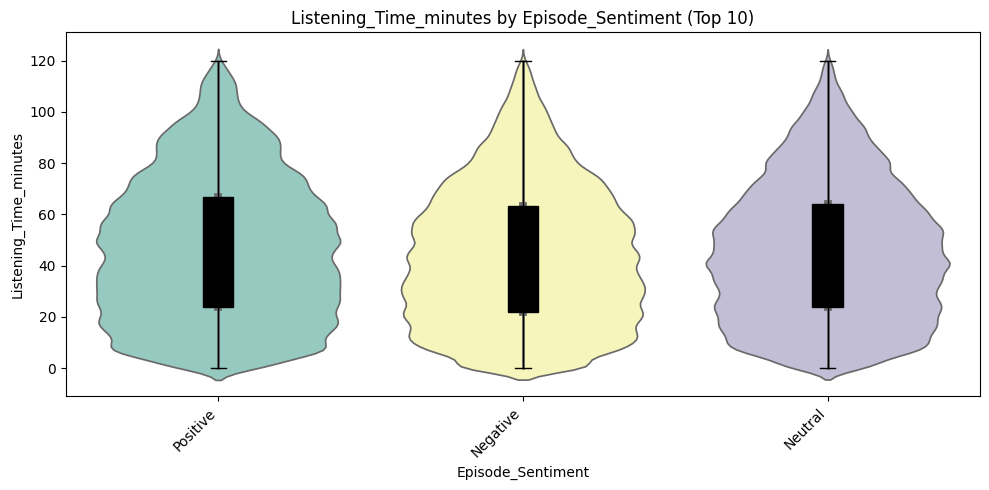

In [30]:
import scipy.stats as stats

top_n = 10

numerical_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

for col in categorical_cols:

    top_categories = train[col].value_counts().nlargest(top_n).index
    filtered_data = train[train[col].isin(top_categories)]

    groups = [group['Listening_Time_minutes'].dropna().values
              for name, group in filtered_data.groupby(col)]

    if len(groups) > 1:
        try:
            f_val, p_val = stats.f_oneway(*groups)
            print(f"{col} (Top {top_n}): F={f_val:.2f}, p={p_val:.4f}")
        except Exception as e:
            print(f"{col}: Error in ANOVA - {e}")

        plt.figure(figsize=(10, 5))
        sns.violinplot(data=filtered_data, x=col, y='Listening_Time_minutes', palette='Set3')
        sns.boxplot(data=filtered_data, x=col, y='Listening_Time_minutes', width=0.1, color='black')
        plt.title(f'Listening_Time_minutes by {col} (Top {top_n})')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col}: Skipped (not enough categories after filtering)")


Observation:

- All p-values are less than 0.05, indicating all categorical variables play significant roles on Listening_Time_minutes.

- There are more density around the value in publication time and episode sentiment. 

- Podcast_Name: The mean listening time significantly differs across podcasts. Some podcasts retain listeners longer than others.

- Episode_Title: Even episode titles correspond to different average listening times—likely capturing unique content or popularity.

- Genre: Different genres (e.g., comedy, news, education) attract different listening behaviors.

- Publication_Day: The day a podcast is published affects average listening time—some days may be more favorable.

- Publication_Time: Time of release also significantly affects listen time (possibly due to audience habits or schedules).

- Episode_Sentiment: Emotional tone (e.g., positive, neutral, negative) has a very strong relationship with listening time (very high F=586.01). Listeners might respond differently based on emotional content.

### Feature Engineer

In [31]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder

test_ids = test['id'].copy()
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

def encode_data(data, categorical_cols):
    
    for col in categorical_cols:
        # Count unique values in the column
        num_unique = data[col].nunique()
        
        if num_unique <= 10:  
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            print(f"Ordinal Encoding applied to {col} with {num_unique} unique values.")
        else:  # Apply One-Hot Encoding if more than 10 unique values
            data = pd.get_dummies(data, columns=[col], drop_first=True)
            print(f"One-Hot Encoding applied to {col} with {num_unique} unique values.")
    
    return data

train = encode_data(train, categorical_cols)
test = encode_data(test, categorical_cols)


One-Hot Encoding applied to Podcast_Name with 48 unique values.
One-Hot Encoding applied to Episode_Title with 100 unique values.
Ordinal Encoding applied to Genre with 10 unique values.
Ordinal Encoding applied to Publication_Day with 7 unique values.
Ordinal Encoding applied to Publication_Time with 4 unique values.
Ordinal Encoding applied to Episode_Sentiment with 3 unique values.
One-Hot Encoding applied to Podcast_Name with 48 unique values.
One-Hot Encoding applied to Episode_Title with 100 unique values.
Ordinal Encoding applied to Genre with 10 unique values.
Ordinal Encoding applied to Publication_Day with 7 unique values.
Ordinal Encoding applied to Publication_Time with 4 unique values.
Ordinal Encoding applied to Episode_Sentiment with 3 unique values.


Observation: I performed one-hot encoding on low-cardinality columns to avoid high dimensionality, especially in tree-based models. Using LabelEncoder for higher-cardinality columns can prevents explosion of features.

### Random Forest Regressor

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# numerical_cols = [col for col in numerical_cols if pd.api.types.is_numeric_dtype(train[col])]
# numerical_cols = numerical_cols[numerical_cols != 'Listening_Time_minutes', 'id']
numerical_cols = [col for col in numerical_cols if col not in ['Listening_Time_minutes', 'id']]

scaler = RobustScaler()

X = train.drop('Listening_Time_minutes', axis=1)  
y = train['Listening_Time_minutes'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


In [33]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 169.2130003674891
RMSE: 13.008189742138953
MAE: 9.471120900076613
R² Score: 0.7703896971669593

==== Test Metrics ====
MSE: 171.81382053483833
RMSE: 13.107777101203633
MAE: 9.540034074717166
R² Score: 0.7663631193661065


Observation:

- MSE (Mean Squared Error): Training MSE is slightly lower than Test MSE, indicating the model is generalizing well and not overfitting. But the values are a bit high overally so there is a room for improvement.
  
- RMSE (Root Mean Squared Error): It is in the same unit as the target variable. A lower RMSE means a better fit and both RMSE are very close, suggesting the model is performing consistently.

- MAE (Mean Absolute Error): The values are similar across both training and testing sets, indicating the model has a similar level of error in its predictions.

- R2 score: They both are 77%, so it is consistent and decent generalization.

- The errros could still be reduced.

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 13.1361


Observation: Train RMSE ≈ CV RMSE ≈ Test RMSE, showing good generalization

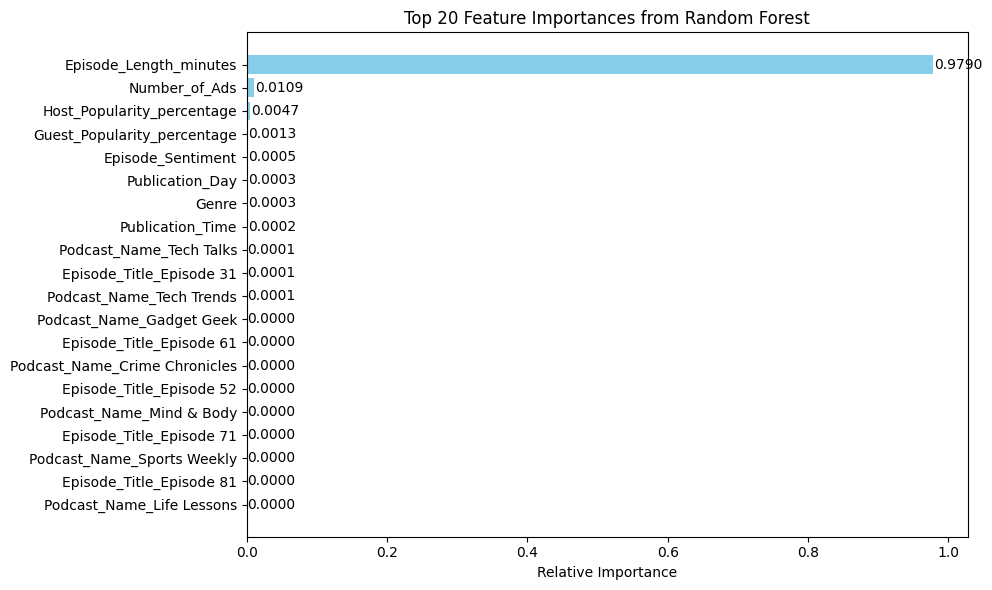

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X_train.columns

top_n = 20
top_indices = indices[:top_n]

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances from Random Forest")
bars = plt.barh(range(top_n), importances[top_indices][::-1], align="center", color="skyblue")
plt.yticks(range(top_n), [feature_names[i] for i in top_indices][::-1])
plt.xlabel("Relative Importance")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center')

plt.tight_layout()
plt.show()


Observation: Episode_Length_minutes is highly correlated with Listening_Time_minutes. It makes intuitive sense. The random forest is relying on this one feature. That's why all other importances are close to 0.

In [41]:
best_rf = RandomForestRegressor(n_estimators=50, max_depth=15, max_features='sqrt',n_jobs=-1, random_state=42)

best_rf.fit(X_train, y_train)

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [42]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 287.6415984808378
RMSE: 16.959999955213377
MAE: 13.341328988820445
R² Score: 0.6096903051708171

==== Test Metrics ====
MSE: 292.4683068874426
RMSE: 17.101704794769514
MAE: 13.44951855133055
R² Score: 0.6022940256333864


Observation:

- More errors (RMSE and MAE) on both train and test sets.

- Lower R2, it explains less variance in the data.

- Not overfitting, but it's a less powerful model overall.

- Previous model performs better.

In [43]:
cv_scores = cross_val_score(best_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 17.0780


Observation: CV RMSE is higher than the previous one. The model is weaker.

In [44]:
best_rf_2 = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42)

best_rf_2.fit(X_train, y_train)

y_train_pred = best_rf_2.predict(X_train)
y_test_pred = best_rf_2.predict(X_test)

In [45]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 121.27312468176812
RMSE: 11.01240776042043
MAE: 7.860103350345295
R² Score: 0.8354407827813692

==== Test Metrics ====
MSE: 165.82119700806638
RMSE: 12.877157955390093
MAE: 9.303424154894095
R² Score: 0.7745120439593082


In [46]:
cv_scores = cross_val_score(best_rf_2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 12.9352


Observation: It aligns well with the Test RMSE, showing the model performs consistently across different data splits.

In [47]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV

# param_dist = {
#     'n_estimators':[100, 300, 500],  
#     'max_depth': [10, 20, None],  
#     'min_samples_split': [2, 10], 
#     'min_samples_leaf': [1, 4],
#     'max_features': ['sqrt', 'log2']  
# }

# halving_search = HalvingRandomSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     factor=2,
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
# )
# halving_search.fit(X_train, y_train)

# print("Best parameters found: ", halving_search.best_params_)

# best_rf = halving_search.best_estimator_

# Observation: I'm choosing HalvingRandomSearchCV for tuning parameters 
# becuase it allocates fewer resources/trees/samples to many candidates at first. 
# Then it keeps only the best-performing cadidates, gradually increasing resources for them. 
# It saves time while still finding good parameters.

# I'm tuning over many hyperparameter combinations so grid and random search 
# can waste time testing bad ones at full cost. On the other hand Halving searches 
# prune weak combinations early, avoiding that waste. It is more efficient 
# to get a result close to optimal in a reasonable amount of time.

In [48]:
test[numerical_cols] = scaler.transform(test[numerical_cols])
predictions = best_rf_2.predict(test)

submission = pd.DataFrame({
    'id': test_ids,
    'Listening_Time_minutes': predictions
})

# Save to CSV
submission.to_csv("submission_bestrf.csv", index=False)

Conclusion: The best_rf_2 model performs better across all major metrics. It has lower error (RMSE, MAE) and higher R2 for both training and test sets. It also generaliezes better, shown by improved cross-validation (CV RMSE).

- The newest model is the clear winner and should be used for prediction and submission.

### Findings

Podcast data is diverse, noisy, and often has hidden patterns.
    - Numerical: Episode length, number of ads, popularity percentages etc
    - Categorical: Genre, host names, guest presence etc
    - Sentiment: Episode sentiment scores, user engagement etc
- Random Forest can handle mixed feature types without extensive preprocessing, which is ideal for podcast dataset.

- Especially listening behaviour is hard to predict 

Random Forest uses multiple decision tress to make predictions. It is more effective when the relationship between the features and the target variable i scomplex or non=linear. 

Since podcast predict listening time, influenced by various features so the relationship can be complex and might not be a simple linear pattern. Random Forest was a strong candidate.

Random Forest can handle missing data bettern than many other models as it doesn't require imputation for every missing value (Although we handled all missing values already). It usally can handle incomplete data without losing too much performance.

Random Forest uses bagging tree, helping reduce overfitting compared to a single decision tree. The capability helps in creating a more generalized model performing well on unseen data.

| Model      | Train R² | Test R² | CV RMSE | Train RMSE | Test RMSE | Train MAE | Test MAE | Observation                                 |
|------------|----------|---------|---------|-------------|------------|------------|-----------|----------------------------------------------|
| **rf**         | 0.7704   | 0.7664  | 13.1361 | 13.0082     | 13.1078    | 9.4711     | 9.5400    | Good baseline, balanced performance          |
| **best_rf**    | 0.6097   | 0.6023  | 17.0780 | 16.9600     | 17.1017    | 13.3413    | 13.4495   | Underfitting, weak performance               |
| **best_rf_2**  | 0.8354   | 0.7745  | 12.9352 | 11.0124     | 12.8772    | 7.8601     | 9.3034    | Best performance, slight overfitting         |

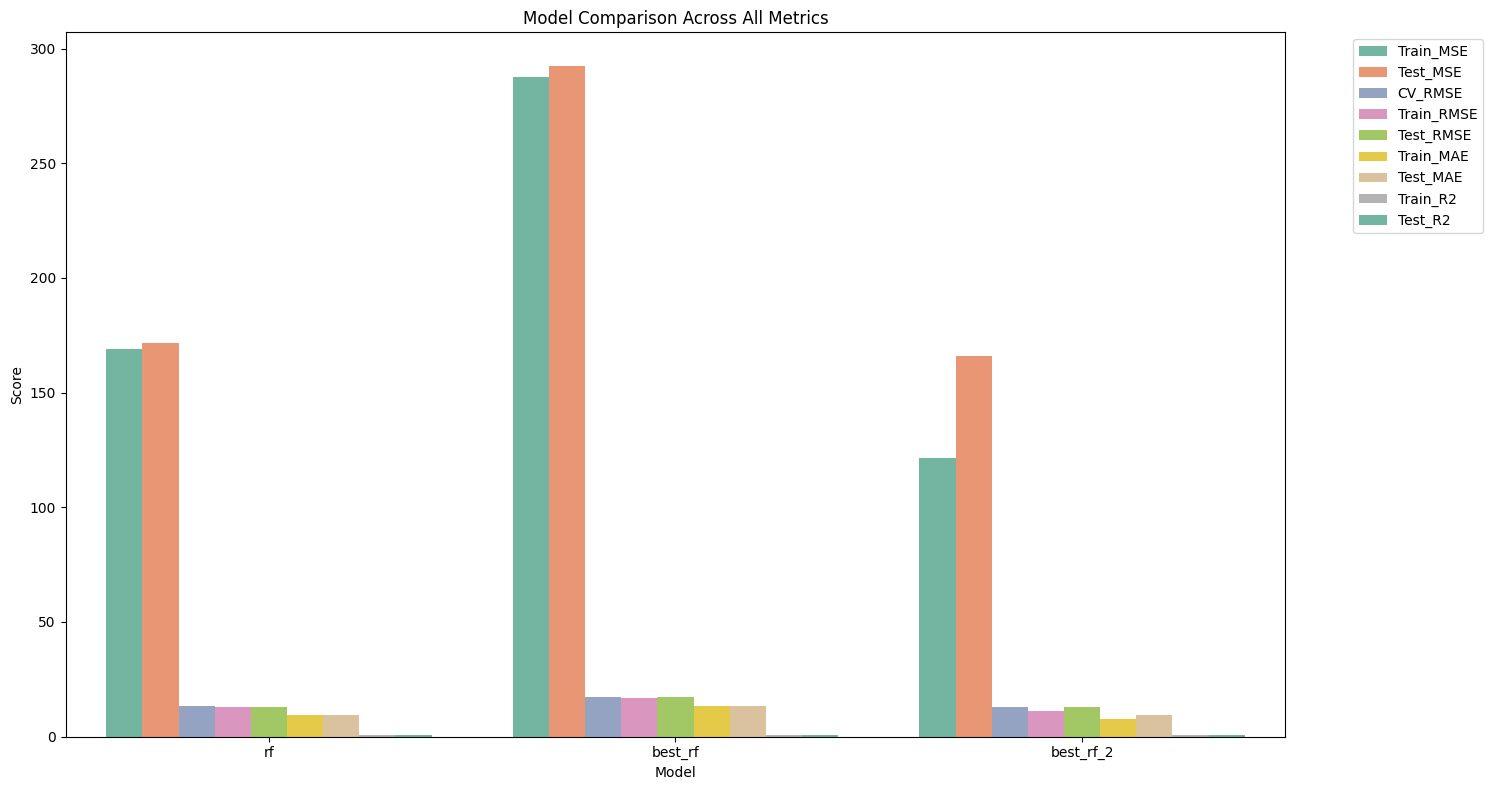

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics data
metrics_data = {
    'Model': ['rf', 'best_rf', 'best_rf_2'],
    'Train_MSE': [169.21, 287.64, 121.27],
    'Test_MSE': [171.81, 292.47, 165.82],
    'CV_RMSE': [13.14, 17.08, 12.94],
    'Train_RMSE': [13.01, 16.96, 11.01],
    'Test_RMSE': [13.11, 17.10, 12.88],
    'Train_MAE': [9.47, 13.34, 7.86],
    'Test_MAE': [9.54, 13.45, 9.30],
    'Train_R2': [0.770, 0.610, 0.835],
    'Test_R2': [0.766, 0.602, 0.775],
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Reshape DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Model Comparison Across All Metrics')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
